In [1]:
import mglearn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from IPython.display import display
from sklearn.model_selection import train_test_split
import sklearn

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# K nearest neighbor classification


## Load the data
We can make some "artificial" data that looks kind of like the output from an N-body-simulation:

Text(0, 0.5, 'Second feature')

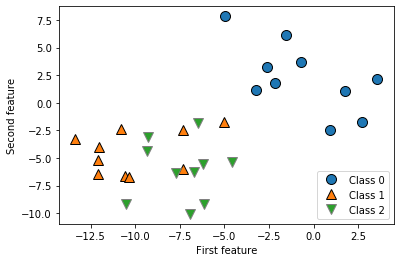

In [2]:
X, y = sklearn.datasets.make_blobs(30, centers = 3, cluster_std=3, random_state=1)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1", "Class 2"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")

## Construct the model

Define the model and set the number of neighbors

In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Train the model:

In [4]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

We can also plot the decision boundary learned by the model:

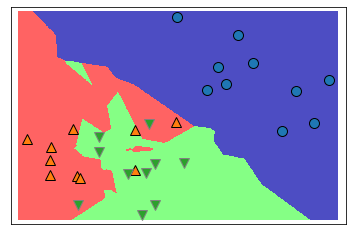

In [5]:
mglearn.plots.plot_2d_classification(clf, X, fill=True, eps=0.5, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

Let's try to compare the decision boundaries obtained by using different values of n_neighbors (k):

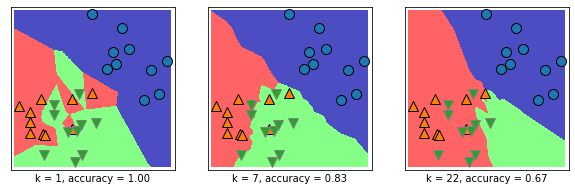

In [6]:
fig, axes = plt.subplots(1,3, figsize=(10,3))


for k, ax in zip([1, 7, 22], axes):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X,y)
    mglearn.plots.plot_2d_classification(clf, X, fill=True, eps=0.5, alpha=.7, ax=ax)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_xlabel("k = {}, accuracy = {:.2f}".format(k,clf.score(X,y)))

When k=1, the model is **overfitting**: it classifies every single datapoint correctly, at the expense of a quite complicated decision boundary! When k=22, the model is **underfitting**: it only classifies a single green item correctly! It seems (to me) that we get an appropriate trade-off between correct classification and a simple decision boundary at k=7.

### Splitting the data in train and test data

There's a better way to identify the value of k that gives the optimal trade-off between over- and underfitting: Split your data set in **training data** and **testing data**:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=69)

Now, we train the model on the train data only, and use the test data to compute the accuracy. Let's try to do that for the tree models we trained above:

In [10]:
for k in [1, 7, 22]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train,y_train)
    print("k = {}: train accuracy = {:.2f}, test accuracy = {:.2f}".format(k,clf.score(X_train,y_train),clf.score(X_test,y_test)))


k = 1: train accuracy = 1.00, test accuracy = 0.62
k = 7: train accuracy = 0.82, test accuracy = 0.75
k = 22: train accuracy = 0.36, test accuracy = 0.25


We can plot the training and testing accuracies as a function of the number of neighbors (k). The best value is the one corresponding to the maximal testing-accuracy!

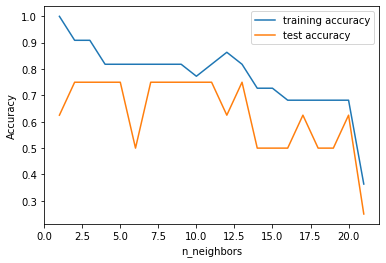

In [11]:
training_accuracy = []
test_accuracy = []

ks = range(1, 22)

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(ks, training_accuracy, label="training accuracy")
plt.plot(ks, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();